In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk


In [2]:
# Ensure the necessary NLTK data is downloaded
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\divya\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
# Load the dataset
data = pd.read_csv("C:\\Users\\divya\\Downloads\\disney_plus_titles_task6.csv")

In [4]:
data.head()   # To represent the first 5 rows of data by default

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
3,s4,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...
4,s5,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...


In [5]:
data.tail()   # To represent last 5 rows of data by default

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1363,s1364,Movie,The Sword in the Stone,Wolfgang Reitherman,"Sebastian Cabot, Karl Swenson, Rickie Sorensen...",United States,"October 1, 2019",1963,G,80 min,"Action-Adventure, Animation, Comedy",Merlin trains a young orphan who's destined to...
1364,s1365,Movie,Those Calloways,Norman Tokar,"Brian Keith, Vera Miles, Brandon de Wilde, Wal...",United States,"October 1, 2019",1965,PG,132 min,"Animals & Nature, Drama, Family",A strong-willed family struggles to establish ...
1365,s1366,TV Show,Disney Kirby Buckets,NaN,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,NaN,2014,TV-Y7,3 Seasons,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
1366,s1367,TV Show,Disney Mech-X4,NaN,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,NaN,2016,TV-Y7,2 Seasons,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...
1367,s1368,TV Show,Imagination Movers,NaN,"Rich Collins, Dave Poche, Scott Durbin, Scott ...",United States,NaN,2008,TV-Y,3 Seasons,"Kids, Music","Rock out with the Imagination Movers, Disney J..."


In [6]:
data.columns.values   # It represents the value of columns

array(['show_id', 'type', 'title', 'director', 'cast', 'country',
       'date_added', 'release_year', 'rating', 'duration', 'listed_in',
       'description'], dtype=object)

In [7]:
data.shape   # It returns the total number of rows and columns of the data set.

(1368, 12)

In [8]:
data.describe()     # It generate descriptive statistics for each numerical column in the dataset.

,release_year
count,1368.000000
mean,2002.348684
std,22.127559
min,1928.000000
25%,1998.000000
50%,2011.000000
75%,2018.000000
max,2021.000000


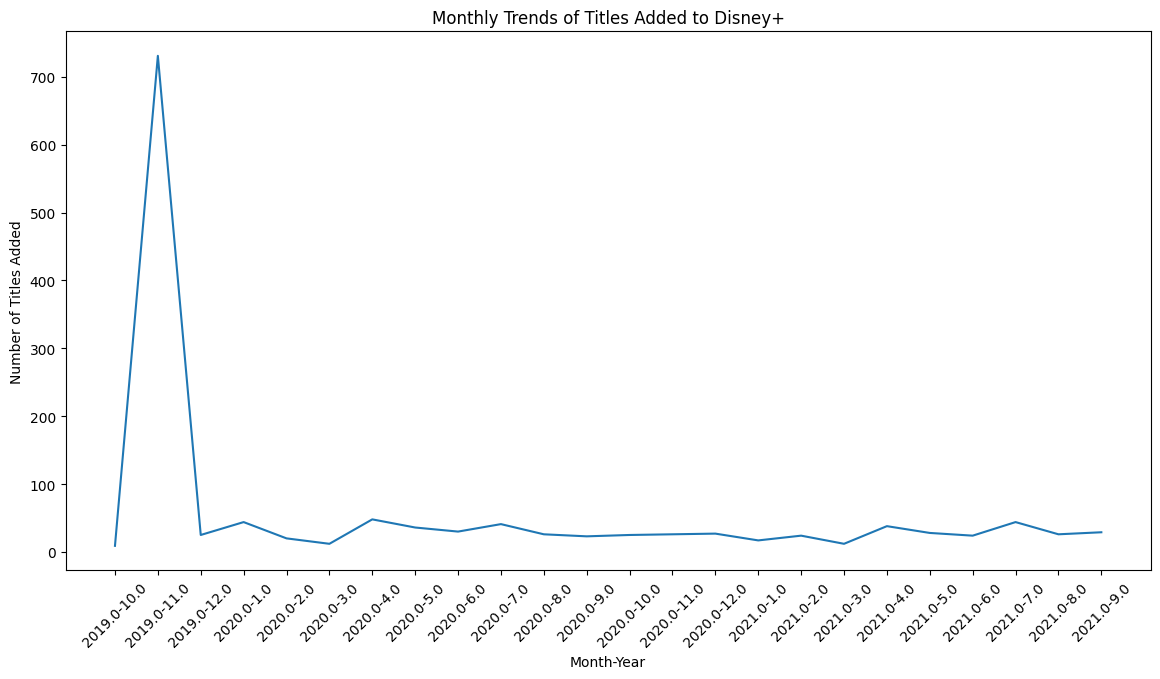

In [9]:
# Task 1: Time Series Analysis (forecasting trends and seasonality)
# Convert 'date_added' to datetime format
data['date_added'] = pd.to_datetime(data['date_added'])

# Extract month and year from 'date_added'
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month

# Group by year and month to get the count of titles added each month
monthly_trends = data.groupby(['year_added', 'month_added']).size().reset_index(name='count')

# Plot the monthly trends
plt.figure(figsize=(14, 7))
plt.plot(monthly_trends['year_added'].astype(str) + '-' + monthly_trends['month_added'].astype(str), 
         monthly_trends['count'])
plt.xticks(rotation=45)
plt.xlabel('Month-Year')
plt.ylabel('Number of Titles Added')
plt.title('Monthly Trends of Titles Added to Disney+')
plt.show()



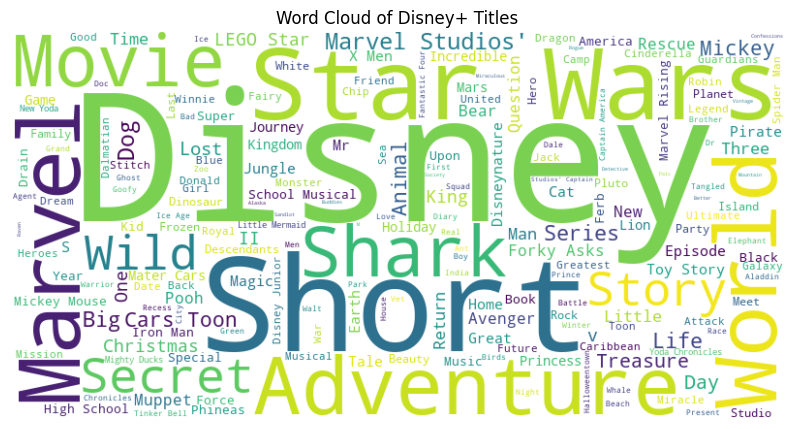

In [10]:
# Task 2: Sentiment Analysis or Text Mining on Unstructured Data
# Generate a word cloud from the 'title' column
text = ' '.join(title for title in data['title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Disney+ Titles')
plt.show()




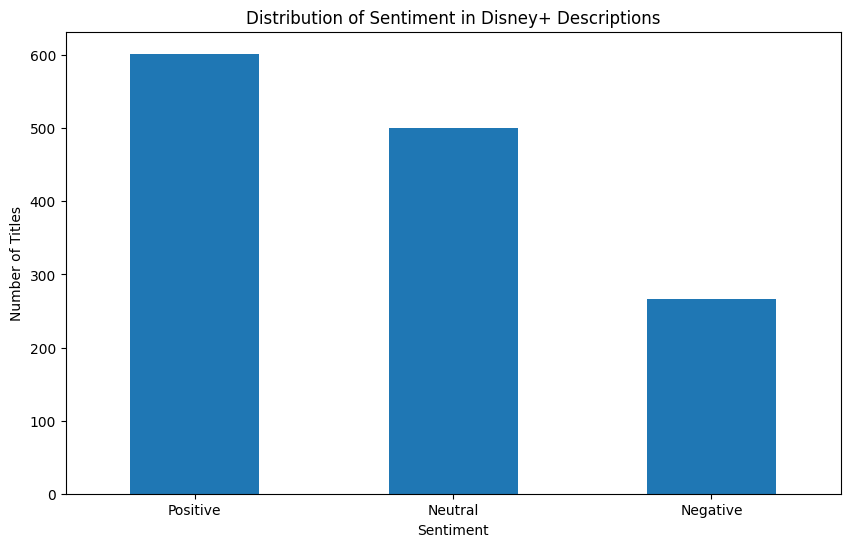

In [11]:
# Perform sentiment analysis on 'description' column
sid = SentimentIntensityAnalyzer()
data['sentiment'] = data['description'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Classify sentiment as positive, negative, or neutral
data['sentiment_class'] = pd.cut(data['sentiment'], bins=[-1, -0.05, 0.05, 1], labels=['Negative', 'Neutral', 'Positive'])

# Plot the distribution of sentiment
sentiment_counts = data['sentiment_class'].value_counts()
plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Number of Titles')
plt.xticks(rotation=0)
plt.title('Distribution of Sentiment in Disney+ Descriptions')
plt.show()

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


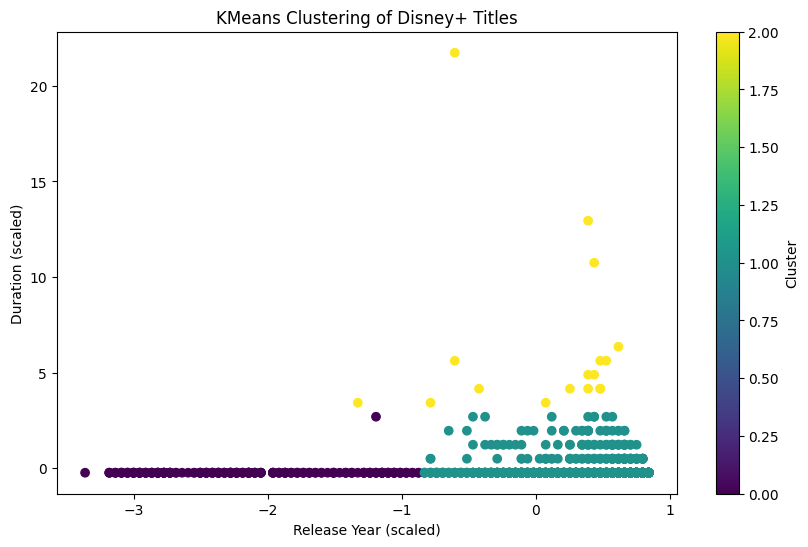

In [12]:
# Task 3: Clustering or Classification Techniques for Segmentation and Pattern Recognition
# Handle non-numeric 'duration' values (e.g., "2 Seasons", "1 Season")
# Extract the number of seasons and convert to numeric, keeping movies as they are
data['duration'] = data['duration'].apply(lambda x: x.split()[0] if 'Season' in x else x)
data['duration'] = pd.to_numeric(data['duration'], errors='coerce')

# Fill NaN values in 'duration' with the median value
data['duration'].fillna(data['duration'].median(), inplace=True)

# Select numerical features for clustering
X_clustering = data[['release_year', 'duration']]

# Scale numerical features
scaler = StandardScaler()
X_clustering_scaled = scaler.fit_transform(X_clustering)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_clustering_scaled)
data['cluster'] = kmeans.labels_

# Plot the clustering results
plt.figure(figsize=(10, 6))
plt.scatter(X_clustering_scaled[:, 0], X_clustering_scaled[:, 1], c=data['cluster'], cmap='viridis', marker='o')
plt.xlabel('Release Year (scaled)')
plt.ylabel('Duration (scaled)')
plt.title('KMeans Clustering of Disney+ Titles')
plt.colorbar(label='Cluster')
plt.show()